In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 100


In [2]:
df=pd.read_csv("D:\Machine Learning\\files\zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Cleaning Data 
 

In [4]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------",df[i].isnull().sum()*100/df.shape[0],"%")  

rate --------- 15.033741322969236 %
phone --------- 2.3357890055494326 %
location --------- 0.04060560357329311 %
rest_type --------- 0.438927238625597 %
dish_liked --------- 54.29162557766305 %
cuisines --------- 0.08701200765705668 %
approx_cost(for two people) --------- 0.669025658874258 %


In [5]:
df.drop(columns=['url','address','menu_item','dish_liked','phone','reviews_list'],inplace=True)

In [6]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)

In [7]:
df = df.replace(r'^\[]s*$-', np.nan, regex=True)

In [8]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------",df[i].isnull().sum()*100/df.shape[0],"%")  

rate --------- 15.033741322969236 %
location --------- 0.04060560357329311 %
rest_type --------- 0.438927238625597 %
cuisines --------- 0.08701200765705668 %
Cost2plates --------- 0.669025658874258 %


In [268]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['rate'] = df['rate'].str.replace('/5', '').replace(' ', '')


In [10]:
df['Cost2plates']=df['Cost2plates'].str.replace(',' , '')

In [11]:
df = df.drop(df[(df['rate'] == 'NEW') | (df['rate'] == '-')].index)

In [12]:
df[['rate', 'votes', 'Cost2plates']] = df[['rate', 'votes', 'Cost2plates']].apply(pd.to_numeric, errors='coerce')

### Drop NaN values

In [13]:
df.drop_duplicates(inplace = True)
df.shape

(49345, 11)

In [14]:
df.dropna(inplace = True)
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield


<Axes: xlabel='Cost2plates'>

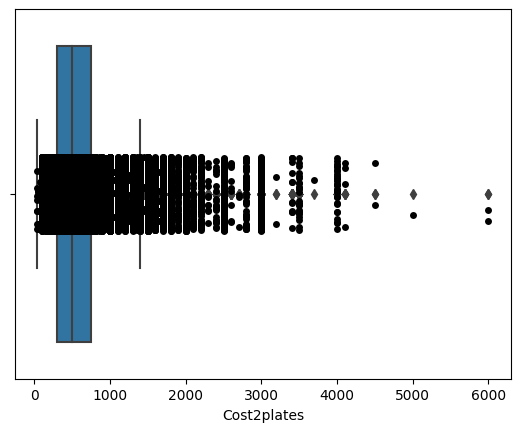

In [15]:
sns.boxplot(x=df['Cost2plates'],data=df)
sns.stripplot(x=df['Cost2plates'],data=df,color='black')

In [21]:
df.sample()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
46458,Break Hour,Yes,No,4.0,97,Rajajinagar,Quick Bites,"Chinese, Beverages",150.0,Delivery,Rajajinagar


### EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1.8'),
  Text(1, 0, '2.0'),
  Text(2, 0, '2.1'),
  Text(3, 0, '2.2'),
  Text(4, 0, '2.3'),
  Text(5, 0, '2.4'),
  Text(6, 0, '2.5'),
  Text(7, 0, '2.6'),
  Text(8, 0, '2.7'),
  Text(9, 0, '2.8'),
  Text(10, 0, '2.9'),
  Text(11, 0, '3.0'),
  Text(12, 0, '3.1'),
  Text(13, 0, '3.2'),
  Text(14, 0, '3.3'),
  Text(15, 0, '3.4'),
  Text(16, 0, '3.5'),
  Text(17, 0, '3.6'),
  Text(18, 0, '3.7'),
  Text(19, 0, '3.8'),
  Text(20, 0, '3.9'),
  Text(21, 0, '4.0'),
  Text(22, 0, '4.1'),
  Text(23, 0, '4.2'),
  Text(24, 0, '4.3'),
  Text(25, 0, '4.4'),
  Text(26, 0, '4.5'),
  Text(27, 0, '4.6'),
  Text(28, 0, '4.7'),
  Text(29, 0, '4.8'),
  Text(30, 0, '4.9')])

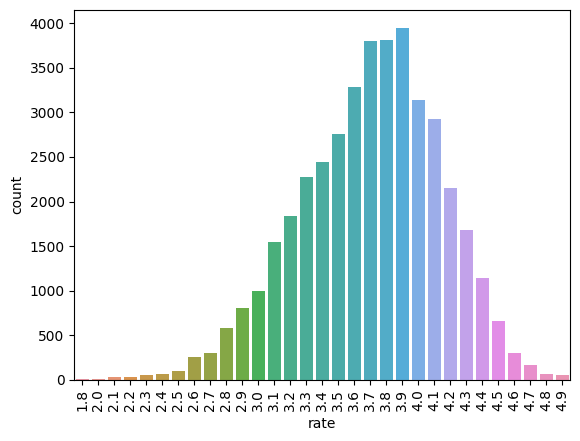

In [16]:
sns.countplot(x=df['rate'])
plt.xticks(rotation = 90)

C:\Users\diaay\AppData\Local\Temp\ipykernel_19164\1978351364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate']  )


<Axes: xlabel='rate', ylabel='Density'>

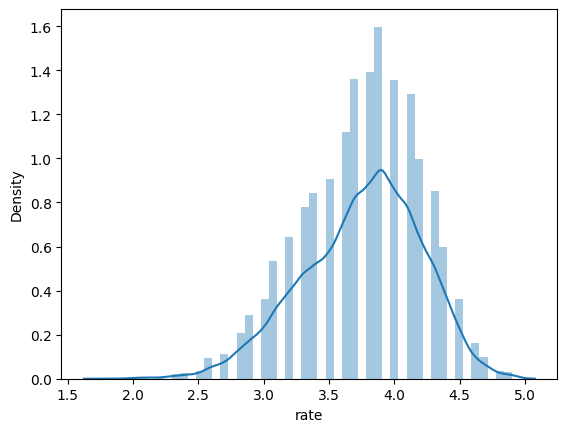

In [283]:
sns.distplot(df['rate']  )


<Axes: xlabel='rate', ylabel='Cost2plates'>

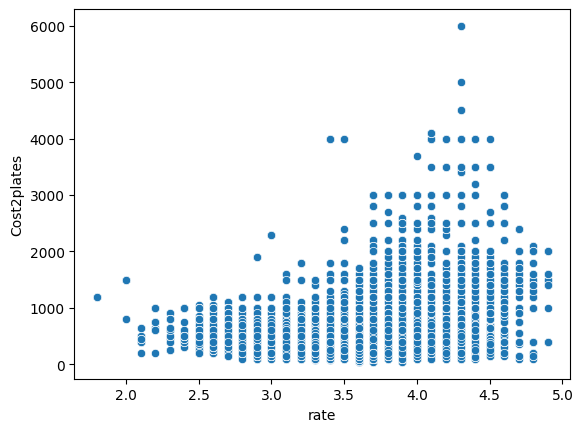

In [17]:
sns.scatterplot(x=df['rate'],y=df['Cost2plates'])

C:\Users\diaay\AppData\Local\Temp\ipykernel_13720\1921467081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cost2plates']  )


<Axes: xlabel='Cost2plates', ylabel='Density'>

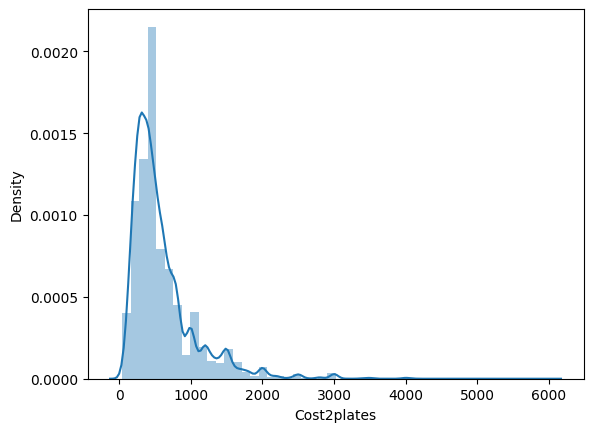

In [18]:
sns.distplot(df['Cost2plates']  )

<Axes: xlabel='rate', ylabel='votes'>

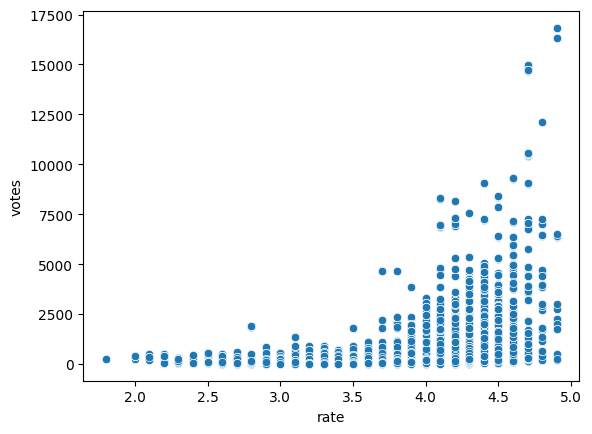

In [19]:
sns.scatterplot(x=df['rate'],y=df['votes'])

#### count the frequency of each cuisine and select the top 10

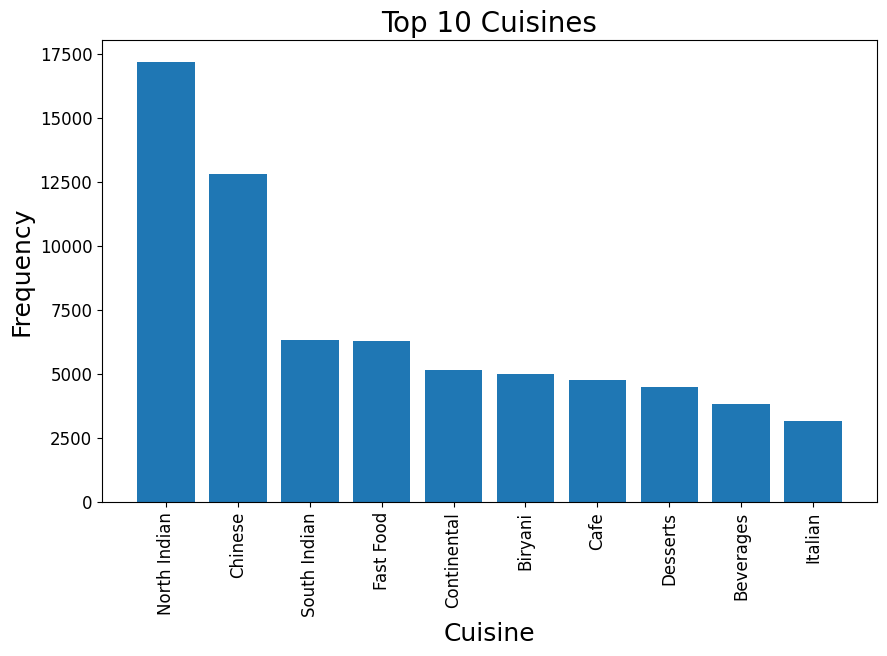

In [20]:
cuisine_counts =df['cuisines'].str.split(', ').explode().value_counts().nlargest(10)


plt.figure(figsize=(10,6))
plt.bar(cuisine_counts.index, cuisine_counts.values)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Cuisine', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Top 10 Cuisines', fontsize=20)
plt.show()


#### count the frequency of each cuisine

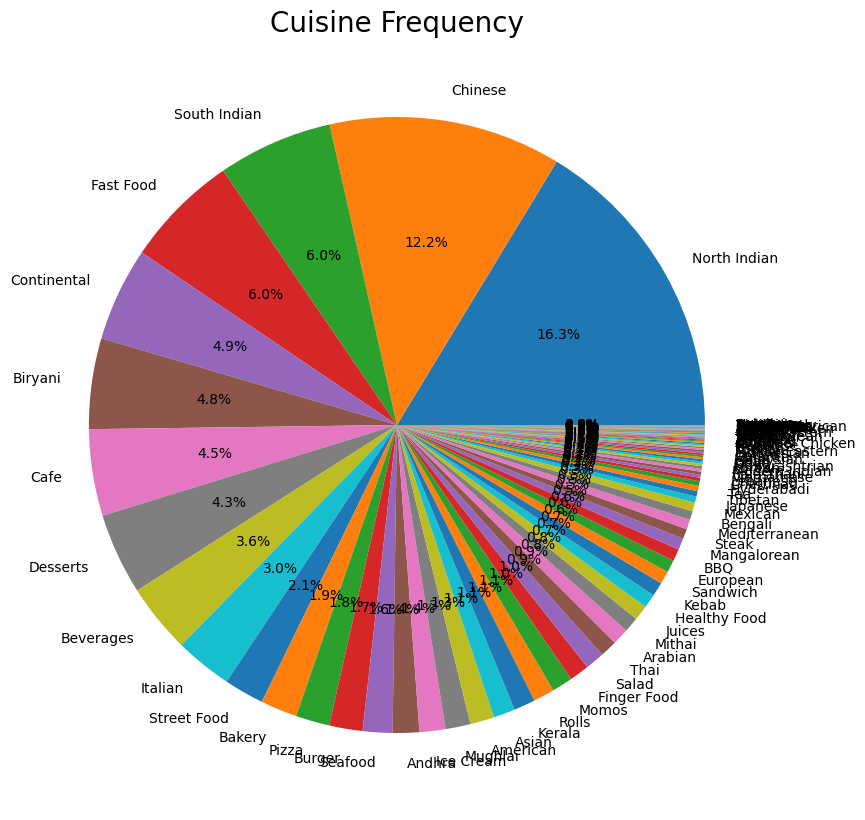

In [21]:
cuisine_counts = df['cuisines'].str.split(', ').explode().value_counts()

plt.figure(figsize=(10,10))
plt.pie(cuisine_counts.values, labels=cuisine_counts.index, autopct='%1.1f%%')
plt.title('Cuisine Frequency', fontsize=20)
plt.show()

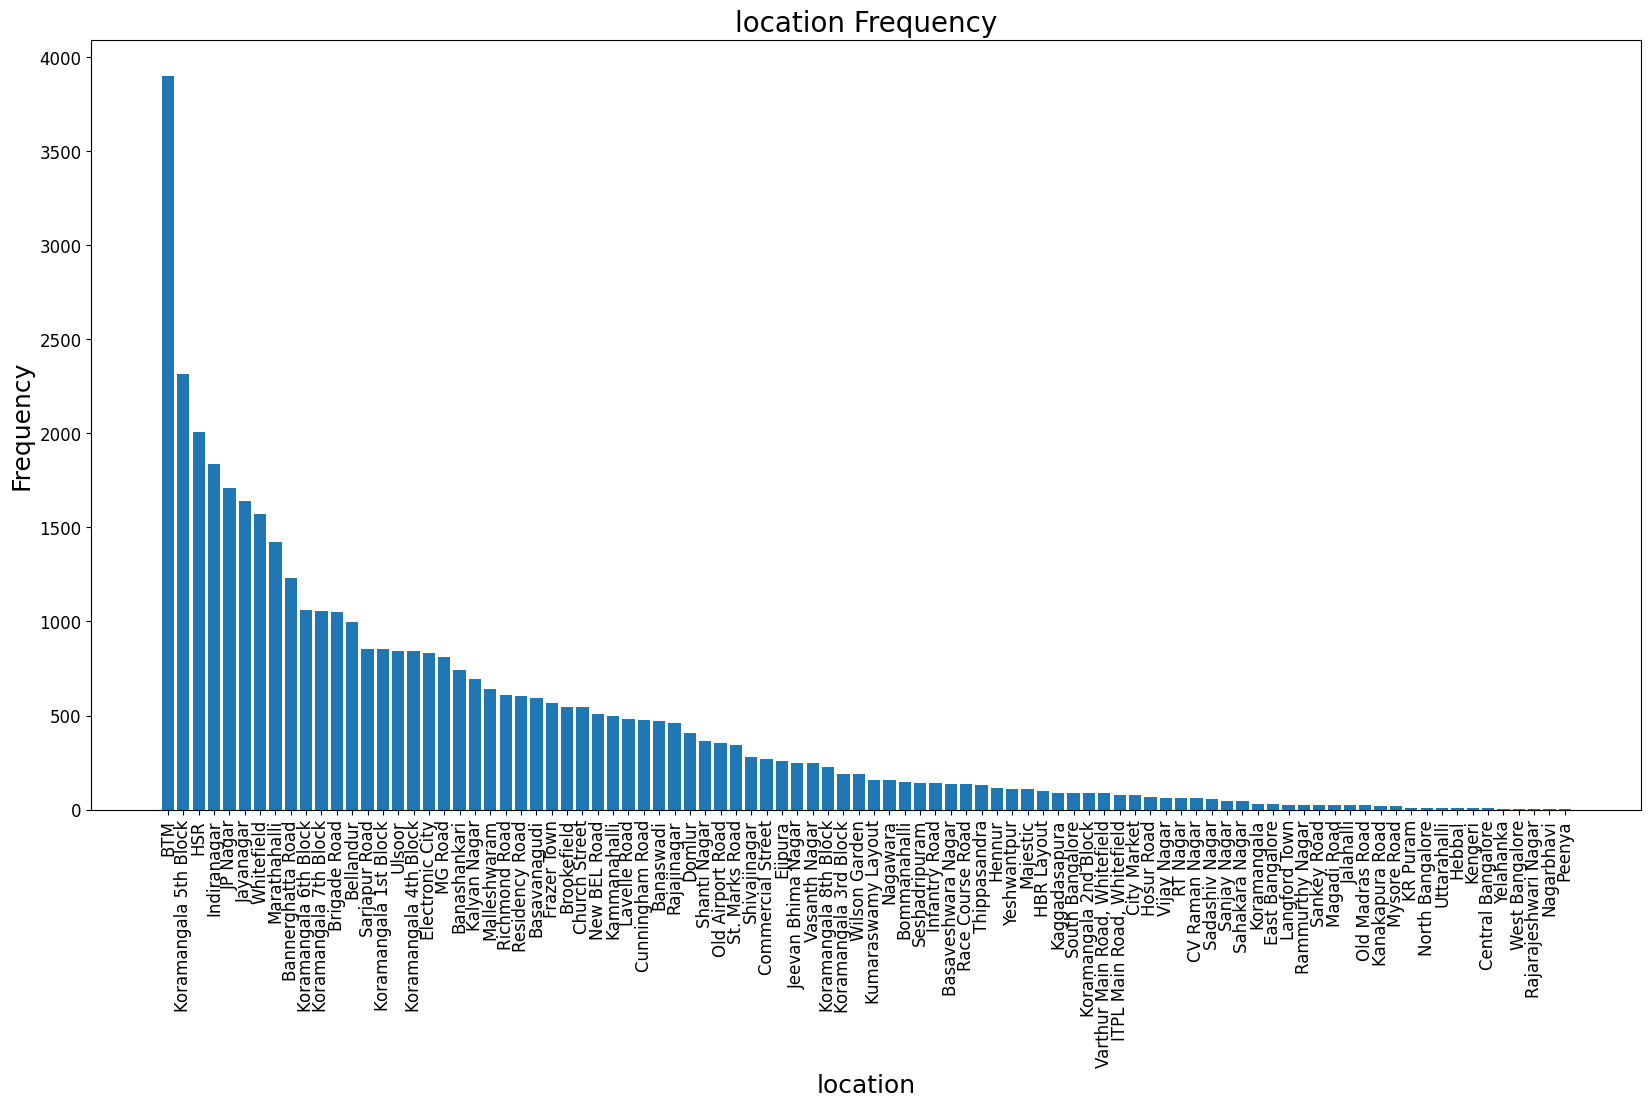

In [23]:
location_counts = df['location'].value_counts()

# create a bar chart of the cuisine frequency
plt.figure(figsize=(20,10))
plt.bar(location_counts.index, location_counts.values)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('location', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('location Frequency', fontsize=20)
plt.show()

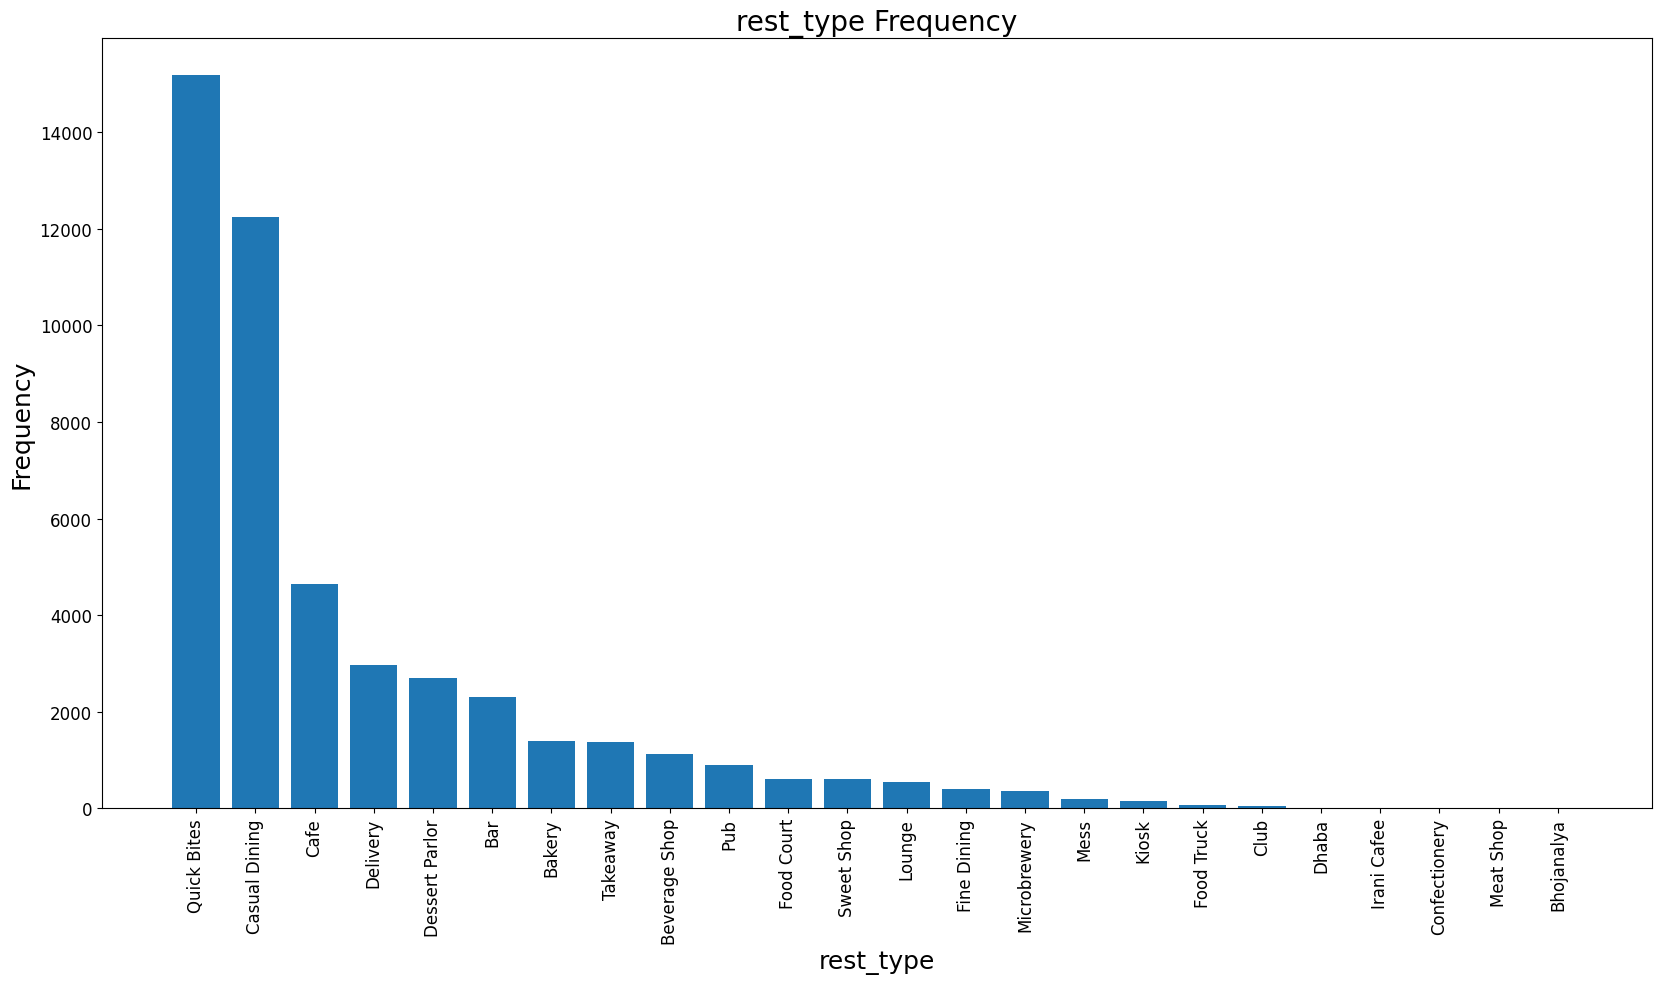

In [24]:
rest_type_counts = df['rest_type'].str.split(', ').explode().value_counts()

# create a bar chart of the cuisine frequency
plt.figure(figsize=(20,10))
plt.bar(rest_type_counts.index, rest_type_counts.values)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('rest_type', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('rest_type Frequency', fontsize=20)
plt.show()

In [22]:
top_10 = df.sort_values(by='rate', ascending=False).head(10)
top_10

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
49627,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Sarjapur Road
32044,Asia Kitchen By Mainland China,Yes,Yes,4.9,2244,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1500.0,Pubs and bars,Koramangala 5th Block
10879,Asia Kitchen By Mainland China,Yes,Yes,4.9,2178,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1500.0,Dine-out,BTM
27453,Asia Kitchen By Mainland China,Yes,Yes,4.9,2217,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1500.0,Delivery,Koramangala 4th Block
8260,AB's - Absolute Barbecues,No,Yes,4.9,6375,BTM,Casual Dining,"European, Mediterranean, North Indian, BBQ",1600.0,Buffet,BTM
14740,Belgian Waffle Factory,Yes,No,4.9,1743,Brigade Road,Dessert Parlor,Desserts,400.0,Delivery,Frazer Town
32436,Asia Kitchen By Mainland China,Yes,Yes,4.9,2244,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1500.0,Delivery,Koramangala 6th Block
18496,Milano Ice Cream,No,No,4.9,2090,Indiranagar,Dessert Parlor,"Ice Cream, Desserts",400.0,Desserts,Indiranagar
8275,Asia Kitchen By Mainland China,Yes,Yes,4.9,2178,Koramangala 5th Block,"Casual Dining, Bar","Asian, Chinese, Thai, Momos",1500.0,Buffet,BTM
5153,Belgian Waffle Factory,Yes,No,4.9,1746,Brigade Road,Dessert Parlor,Desserts,400.0,Delivery,Brigade Road


In [23]:
low_10 = df.sort_values(by='rate', ascending=True).head(10)
low_10

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
12540,Alibi - Maya International Hotel,No,No,1.8,224,Church Street,Casual Dining,"North Indian, Continental, Chinese",1200.0,Dine-out,Church Street
6300,Alibi - Maya International Hotel,No,No,1.8,224,Church Street,Casual Dining,"North Indian, Continental, Chinese",1200.0,Dine-out,Brigade Road
43489,Alibi - Maya International Hotel,No,No,1.8,225,Church Street,Casual Dining,"North Indian, Continental, Chinese",1200.0,Dine-out,MG Road
48390,Alibi - Maya International Hotel,No,No,1.8,225,Church Street,Casual Dining,"North Indian, Continental, Chinese",1200.0,Dine-out,Residency Road
38870,Alibi - Maya International Hotel,No,No,1.8,225,Church Street,Casual Dining,"North Indian, Continental, Chinese",1200.0,Dine-out,Lavelle Road
40698,Bhagini,No,No,2.0,259,Marathahalli,Casual Dining,"Andhra, South Indian, Chinese, North Indian",800.0,Delivery,Marathahalli
48292,Fusion Lounge,No,No,2.0,398,Brigade Road,Lounge,Finger Food,1500.0,Dine-out,Residency Road
5963,Fusion Lounge,No,No,2.0,395,Brigade Road,Lounge,Finger Food,1500.0,Dine-out,Brigade Road
12699,Fusion Lounge,No,No,2.0,396,Brigade Road,Lounge,Finger Food,1500.0,Dine-out,Church Street
43390,Fusion Lounge,No,No,2.0,397,Brigade Road,Lounge,Finger Food,1500.0,Dine-out,MG Road


In [24]:
top_votes_10= top_10 = df.sort_values(by='votes', ascending=False).head(10)
top_votes_10

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
49627,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Sarjapur Road
50059,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife,Sarjapur Road
49170,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Delivery,Sarjapur Road
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Delivery,Bellandur
4944,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife,Bellandur
4801,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Continental, North Indian, Italian, South Indi...",1600.0,Dine-out,Bellandur
18643,Toit,No,No,4.7,14956,Indiranagar,Microbrewery,"Italian, American, Pizza",1500.0,Dine-out,Indiranagar
19268,Toit,No,No,4.7,14956,Indiranagar,Microbrewery,"Italian, American, Pizza",1500.0,Drinks & nightlife,Indiranagar
36668,Truffles,No,No,4.7,14726,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,Dine-out,Koramangala 7th Block
34779,Truffles,No,No,4.7,14723,Koramangala 5th Block,"Cafe, Casual Dining","Cafe, American, Burger, Steak",900.0,Cafes,Koramangala 7th Block


In [25]:
top_cost2place_10= df.sort_values(by='Cost2plates', ascending=False).head(10)
top_cost2place_10

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
19139,Le Cirque Signature - The Leela Palace,No,Yes,4.3,126,Old Airport Road,Fine Dining,"French, Italian",6000.0,Dine-out,Indiranagar
45618,Le Cirque Signature - The Leela Palace,No,Yes,4.3,128,Old Airport Road,Fine Dining,"French, Italian",6000.0,Dine-out,Old Airport Road
40266,Royal Afghan - ITC Windsor,No,Yes,4.3,413,Sankey Road,Fine Dining,"North Indian, Mughlai",5000.0,Dine-out,Malleshwaram
41591,Malties - Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,Dine-out,Marathahalli
42141,Malties - Radisson Blu,No,No,4.3,53,Marathahalli,Lounge,"Continental, Fast Food",4500.0,Drinks & nightlife,Marathahalli
37715,La Brasserie - Le Meridien,No,Yes,4.1,309,Sankey Road,Fine Dining,"North Indian, Continental, Japanese, Chinese, ...",4100.0,Buffet,Lavelle Road
39125,La Brasserie - Le Meridien,No,Yes,4.1,309,Sankey Road,Fine Dining,"North Indian, Continental, Japanese, Chinese, ...",4100.0,Dine-out,Lavelle Road
39416,La Brasserie - Le Meridien,No,Yes,4.1,309,Sankey Road,Fine Dining,"North Indian, Continental, Japanese, Chinese, ...",4100.0,Buffet,Malleshwaram
40262,La Brasserie - Le Meridien,No,Yes,4.1,309,Sankey Road,Fine Dining,"North Indian, Continental, Japanese, Chinese, ...",4100.0,Dine-out,Malleshwaram
6104,Alba - JW Marriott Bengaluru,No,Yes,4.5,583,Lavelle Road,Fine Dining,Italian,4000.0,Dine-out,Brigade Road


### Encode target

In [26]:
def convert_rate(value):
    if float(value) >= 3.75:
        return 1
    else:
        return 0

df['rate'] = df['rate'].apply(convert_rate)
df.rename(columns = {'rate':'succeedorNOT'}, inplace = True)

In [27]:
df['succeedorNOT']

0        1
1        1
2        1
3        0
4        1
        ..
51709    0
51711    0
51712    0
51715    1
51716    0
Name: succeedorNOT, Length: 41190, dtype: int64

<Axes: xlabel='succeedorNOT', ylabel='count'>

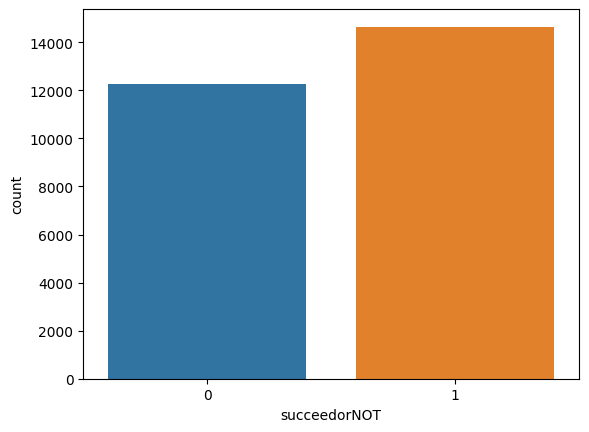

In [297]:
sns.countplot(x=df['succeedorNOT'])

<Axes: xlabel='book_table', ylabel='count'>

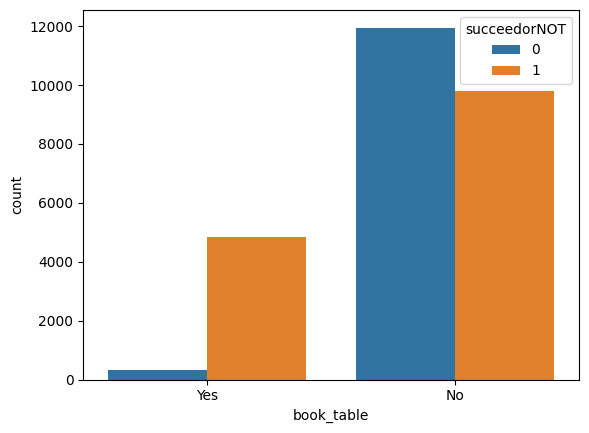

In [298]:
sns.countplot(x=df['book_table'],hue=df['succeedorNOT'])

<Axes: xlabel='location', ylabel='count'>

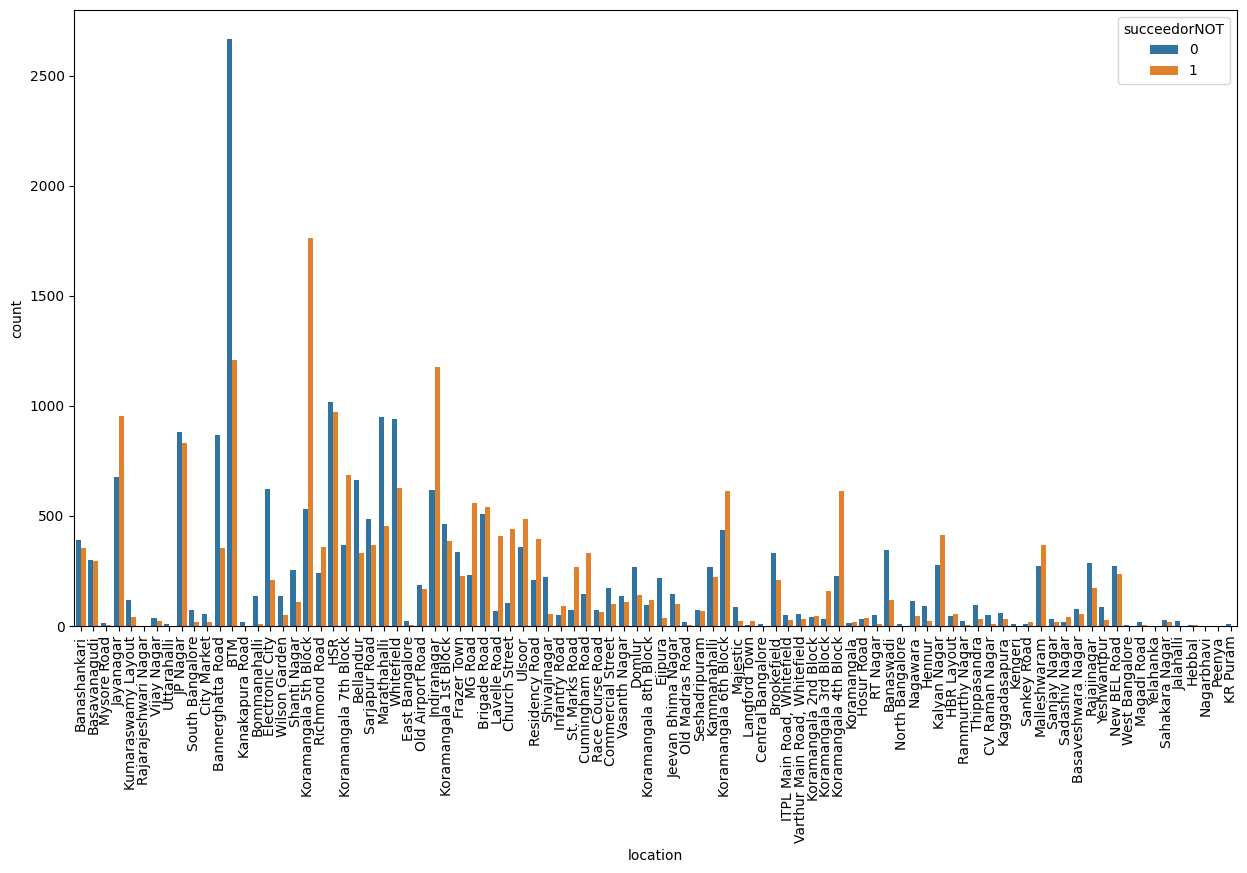

In [29]:
plt.figure(figsize=[15,8])

plt.xticks(rotation = 90)
sns.countplot(x=df['location'],hue=df['succeedorNOT'])

In [31]:
df.drop(columns='name',inplace=True)

### Split Data into input and output

In [32]:
x=df.drop('succeedorNOT',axis=1)
y=df['succeedorNOT']

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
x['cuisines'].fillna('Unknown', inplace=True)
encoded_cuisines = mlb.fit_transform(x['cuisines'].str.split(', '))
for i, cuisine in enumerate(mlb.classes_):
    x[cuisine] = encoded_cuisines[:, i]

x = x.drop('cuisines', axis=1)

C:\Users\diaay\AppData\Local\Temp\ipykernel_13720\1370869354.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x[cuisine] = encoded_cuisines[:, i]
C:\Users\diaay\AppData\Local\Temp\ipykernel_13720\1370869354.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x[cuisine] = encoded_cuisines[:, i]
C:\Users\diaay\AppData\Local\Temp\ipykernel_13720\1370869354.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all c

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

encoded_cuisines = mlb.fit_transform(x['rest_type'].str.split(', '))
for i, rest_type in enumerate(mlb.classes_):
    x[rest_type] = encoded_cuisines[:, i]
x = x.drop('rest_type', axis=1)

C:\Users\diaay\AppData\Local\Temp\ipykernel_13720\2052091937.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x[rest_type] = encoded_cuisines[:, i]
C:\Users\diaay\AppData\Local\Temp\ipykernel_13720\2052091937.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x[rest_type] = encoded_cuisines[:, i]
C:\Users\diaay\AppData\Local\Temp\ipykernel_13720\2052091937.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

In [35]:
x=pd.get_dummies(x,drop_first=True)

### Split Data into train and test 

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state= 0,stratify=y)

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### Handle Imbalance Data

In [38]:
from imblearn.over_sampling import SMOTE
over_sample=SMOTE()
x_train_sampled , y_train_sampled=over_sample.fit_resample(x_train_scaled,y_train)

### Modeling

#### Logistic Regression

In [39]:
from sklearn.model_selection import cross_validate,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression()
lr.fit(x_train_sampled,y_train_sampled)
y_pred = lr.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,lr.predict(x_train_sampled)))
print(classification_report(y_test,y_pred))

evaluation for training 
               precision    recall  f1-score   support

           0       0.77      0.88      0.82     16922
           1       0.86      0.74      0.80     16922

    accuracy                           0.81     33844
   macro avg       0.82      0.81      0.81     33844
weighted avg       0.82      0.81      0.81     33844

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      4231
           1       0.85      0.73      0.78      4007

    accuracy                           0.80      8238
   macro avg       0.81      0.80      0.80      8238
weighted avg       0.81      0.80      0.80      8238



c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Cross validation 

In [40]:
x_train.shape

(32952, 257)

In [ ]:
lr = LogisticRegression()
scores = cross_validate(lr,x_train_sampled,y_train_sampled,cv=10,return_train_score=True,scoring = ('accuracy','recall','precision'),n_jobs=-1)

In [ ]:
scores

{'fit_time': array([1.33075404, 4.66751146, 4.68386865, 4.65131688, 4.68847179,
        1.94977379, 4.47693515, 4.06641483, 3.3856535 , 2.65116   ]),
 'score_time': array([0.01553583, 0.02658415, 0.02003694, 0.02105093, 0.0170579 ,
        0.01401615, 0.01604438, 0.00954962, 0.0210166 , 0.01667571]),
 'test_accuracy': array([0.8033419 , 0.80891174, 0.81233933, 0.79991431, 0.80805484,
        0.81748072, 0.81019709, 0.81619537, 0.81191088, 0.8251928 ]),
 'train_accuracy': array([0.8164334 , 0.81705227, 0.81619537, 0.8164334 , 0.81748072,
        0.81543369, 0.8155289 , 0.81648101, 0.81638579, 0.81419594]),
 'test_recall': array([0.7386461 , 0.74550129, 0.73693231, 0.72236504, 0.7412168 ,
        0.76263925, 0.74892888, 0.74978578, 0.739503  , 0.73521851]),
 'train_recall': array([0.7474055 , 0.74664382, 0.74692945, 0.74845282, 0.74835761,
        0.74569171, 0.74626297, 0.74750071, 0.74540607, 0.74464439]),
 'test_precision': array([0.8484252 , 0.85377821, 0.86781029, 0.85496957, 0.8555

In [ ]:
scores['train_accuracy'].mean()

0.8161620489383985

In [ ]:
scores['test_accuracy'].mean()

0.8113538988860325

In [ ]:
y_pred = cross_val_predict(lr,x_train_sampled,y_train_sampled,cv=10,n_jobs=-1)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_sampled,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82     11670
           1       0.86      0.74      0.80     11670

    accuracy                           0.81     23340
   macro avg       0.82      0.81      0.81     23340
weighted avg       0.82      0.81      0.81     23340



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_sampled,y_train_sampled)
y_pred_knn = knn.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,knn.predict(x_train_sampled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_knn))

evaluation for training 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89     11670
           1       0.91      0.86      0.89     11670

    accuracy                           0.89     23340
   macro avg       0.89      0.89      0.89     23340
weighted avg       0.89      0.89      0.89     23340

evaluation for testing 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      2442
           1       0.86      0.79      0.82      2917

    accuracy                           0.82      5359
   macro avg       0.82      0.82      0.82      5359
weighted avg       0.82      0.82      0.82      5359



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_sampled,y_train_sampled)
y_pred_dt = dt.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,dt.predict(x_train_sampled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_dt))

evaluation for training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11670
           1       1.00      1.00      1.00     11670

    accuracy                           1.00     23340
   macro avg       1.00      1.00      1.00     23340
weighted avg       1.00      1.00      1.00     23340

evaluation for testing 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2442
           1       0.95      0.95      0.95      2917

    accuracy                           0.95      5359
   macro avg       0.95      0.95      0.95      5359
weighted avg       0.95      0.95      0.95      5359



In [ ]:
from sklearn.model_selection import cross_validate,cross_val_predict
dt = DecisionTreeClassifier()
scores_dt = cross_validate(dt,x_train_sampled,y_train_sampled,cv=10,return_train_score=True,scoring = ('accuracy','recall','precision'),n_jobs=-1)

In [ ]:
scores_dt

{'fit_time': array([1.70899081, 1.73002768, 1.55331326, 2.22184229, 2.25989938,
        2.28942585, 2.15439701, 2.09009552, 1.22183347, 1.11464477]),
 'score_time': array([0.01704788, 0.01650047, 0.02308393, 0.01802158, 0.01704407,
        0.01605773, 0.01905251, 0.01655412, 0.01052165, 0.00748658]),
 'test_accuracy': array([0.9327335 , 0.93701799, 0.94258783, 0.92630677, 0.9335904 ,
        0.94344473, 0.93744644, 0.93487575, 0.92973436, 0.92373608]),
 'train_accuracy': array([0.99890507, 0.99880986, 0.99885747, 0.99885747, 0.99895268,
        0.99880986, 0.99876226, 0.99880986, 0.99876226, 0.99857184]),
 'test_recall': array([0.93144816, 0.94001714, 0.94687232, 0.9143102 , 0.93144816,
        0.94430163, 0.93401885, 0.93744644, 0.93316195, 0.94344473]),
 'train_recall': array([0.99781015, 0.99761973, 0.99771494, 0.99771494, 0.99790536,
        0.99761973, 0.99752452, 0.99761973, 0.99752452, 0.99714367]),
 'test_precision': array([0.9338488 , 0.93441227, 0.93882753, 0.93678665, 0.9354

In [ ]:
scores_dt['train_accuracy'].mean()

0.9988098638484242

In [ ]:
scores_dt['test_accuracy'].mean()

0.934147386461011

In [ ]:
y_pred = cross_val_predict(dt,x,y,cv=5,n_jobs=-1)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12208
           1       0.91      0.89      0.90     14587

    accuracy                           0.89     26795
   macro avg       0.89      0.89      0.89     26795
weighted avg       0.89      0.89      0.89     26795



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters_dt = {
                'criterion':['gini','entropy'],
                 'max_depth':[42,44,46,48]
                 
              }

dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator =dt,param_grid=parameters_dt,cv=5,scoring='accuracy',n_jobs=-1)
grid_search_dt.fit(x_train_sampled,y_train_sampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [42, 44, 46, 48]},
             scoring='accuracy')

In [ ]:
grid_search_dt.best_score_

0.9194087403598971

In [ ]:
grid_search_dt.best_params_

{'criterion': 'gini', 'max_depth': 42}

In [ ]:
final_dt_model = grid_search_dt.best_estimator_
final_dt_model

DecisionTreeClassifier(max_depth=44)

In [ ]:
scores_dt_hyperparameter = cross_validate(final_dt_model,x,y,cv=10,return_train_score=True,scoring = ('accuracy','recall','precision'),n_jobs=-1)

In [ ]:
scores_dt_hyperparameter


{'fit_time': array([1.93051791, 1.80580664, 2.01897836, 1.8524797 , 1.81068873,
        1.91601038, 1.95471478, 1.76866627, 1.49122238, 1.50843287]),
 'score_time': array([0.04309011, 0.02948976, 0.05056953, 0.05007291, 0.03419375,
        0.05474734, 0.0452292 , 0.04272032, 0.03400159, 0.01865864]),
 'test_accuracy': array([0.86940299, 0.90634328, 0.9261194 , 0.86343284, 0.89104478,
        0.91452034, 0.924972  , 0.90369541, 0.91564016, 0.90294886]),
 'train_accuracy': array([0.99527265, 0.99829981, 0.99419448, 0.99829981, 0.99854862,
        0.99863161, 0.99846575, 0.99838282, 0.99846575, 0.99829988]),
 'test_recall': array([0.88142563, 0.91295408, 0.93283071, 0.80877313, 0.92049349,
        0.9314599 , 0.97189856, 0.89506173, 0.92043896, 0.89917695]),
 'train_recall': array([0.99139244, 0.9968769 , 0.98979281, 0.9968769 , 0.99733394,
        0.99748629, 0.9971816 , 0.99741031, 0.99718181, 0.99687714]),
 'test_precision': array([0.87901572, 0.91483516, 0.93155373, 0.93133386, 0.8841

In [ ]:
scores_dt_hyperparameter['train_accuracy'].mean()

0.9976861196524492

In [ ]:
scores_dt_hyperparameter['test_accuracy'].mean()

0.9018120065963574

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_sampled,y_train_sampled)
y_pred_rf = rf.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,rf.predict(x_train_sampled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_rf))

evaluation for training 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11670
           1       1.00      1.00      1.00     11670

    accuracy                           1.00     23340
   macro avg       1.00      1.00      1.00     23340
weighted avg       1.00      1.00      1.00     23340

evaluation for testing 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      2442
           1       0.96      0.93      0.94      2917

    accuracy                           0.94      5359
   macro avg       0.94      0.94      0.94      5359
weighted avg       0.94      0.94      0.94      5359



In [ ]:
rf = RandomForestClassifier()
scores_rf = cross_validate(rf,x_train_sampled,y_train_sampled,cv=10,return_train_score=True,scoring = ('accuracy','recall','precision'),n_jobs=-1)

In [ ]:
scores_rf

{'fit_time': array([16.41399789, 17.1414454 , 16.93097043, 16.74420619, 16.57598233,
        16.52037811, 16.60400772, 16.88569689,  7.47174501,  7.28357601]),
 'score_time': array([0.21460462, 0.23752141, 0.24852729, 0.2594049 , 0.22856116,
        0.22481871, 0.23363781, 0.22423029, 0.1012547 , 0.10253501]),
 'test_accuracy': array([0.92930591, 0.92544987, 0.93401885, 0.92373608, 0.92373608,
        0.93573265, 0.92544987, 0.93144816, 0.94987147, 0.95586975]),
 'train_accuracy': array([0.99890507, 0.99880986, 0.99885747, 0.99885747, 0.99895268,
        0.99880986, 0.99876226, 0.99880986, 0.99876226, 0.99857184]),
 'test_recall': array([0.91688089, 0.91859469, 0.93916024, 0.91602399, 0.9134533 ,
        0.92973436, 0.91773779, 0.92630677, 0.92973436, 0.92373608]),
 'train_recall': array([0.99876226, 0.99857184, 0.99866705, 0.99876226, 0.99876226,
        0.99876226, 0.99866705, 0.99895268, 0.99895268, 0.99819099]),
 'test_precision': array([0.94024605, 0.93136403, 0.92960136, 0.930374

In [ ]:
parameters_rf = {'n_estimators':[100,200,250],
                'criterion':['gini'],
                 'max_depth':[48]
                 
              }
grid_search_rf = GridSearchCV(estimator =rf,param_grid=parameters_rf,cv=5,scoring='accuracy',n_jobs=-1)
grid_search_rf.fit(x_train_sampled,y_train_sampled)              

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [48],
                         'n_estimators': [100, 200, 250]},
             scoring='accuracy')

In [ ]:
grid_search_rf.best_score_

0.9268637532133676

In [ ]:
grid_search_rf.best_params_

{'criterion': 'gini', 'max_depth': 48, 'n_estimators': 250}

In [ ]:
final_rf_model = grid_search_rf.best_estimator_
final_rf_model

RandomForestClassifier(max_depth=48, n_estimators=250)

In [ ]:
scores_rf_hyperparameter = cross_validate(final_rf_model,x_train_sampled,y_train_sampled,cv=10,return_train_score=True,scoring = ('accuracy','recall','precision'),n_jobs=-1)

In [ ]:
scores_rf_hyperparameter


{'fit_time': array([40.47253513, 41.47076797, 41.41463757, 40.92902803, 41.02832484,
        41.36978245, 40.89211798, 41.46625328, 17.68142772, 17.5271318 ]),
 'score_time': array([0.55479217, 0.56467986, 0.54544806, 0.51482081, 0.52376866,
        0.54944682, 0.50213027, 0.55640364, 0.25169635, 0.24648619]),
 'test_accuracy': array([0.92544987, 0.92802057, 0.93144816, 0.92673522, 0.92630677,
        0.93487575, 0.92459297, 0.92930591, 0.94730077, 0.95844045]),
 'train_accuracy': array([0.99833381, 0.99833381, 0.99842902, 0.99838141, 0.99861944,
        0.99838141, 0.9982862 , 0.9982862 , 0.9982862 , 0.99800057]),
 'test_recall': array([0.9125964 , 0.92116538, 0.92802057, 0.91602399, 0.9151671 ,
        0.92716367, 0.91945159, 0.92459297, 0.92373608, 0.92459297]),
 'train_recall': array([0.99714367, 0.99714367, 0.9973341 , 0.99723888, 0.99771494,
        0.99723888, 0.99723888, 0.99704846, 0.99704846, 0.99638199]),
 'test_precision': array([0.93667546, 0.93397046, 0.93442623, 0.936077

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_scaled,y_train)
y_pred_svm = svm.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train,svm.predict(x_train_scaled)))
print('evaluation for testing \n',classification_report(y_test,y_pred_svm))

evaluation for training 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84      9820
           1       0.92      0.78      0.84     11716

    accuracy                           0.84     21536
   macro avg       0.85      0.85      0.84     21536
weighted avg       0.85      0.84      0.84     21536

evaluation for testing 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81      2455
           1       0.88      0.76      0.82      2930

    accuracy                           0.82      5385
   macro avg       0.82      0.82      0.82      5385
weighted avg       0.82      0.82      0.82      5385



In [ ]:
! pip install xgboost

     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/70.9 MB 1.3 MB/s eta 0:00:56
     ---------------------------------------- 0.0/70.9 MB 1.3 MB/s eta 0:00:56
     --------------------------------------- 0.0/70.9 MB 245.8 kB/s eta 0:04:49
     --------------------------------------- 0.1/70.9 MB 252.2 kB/s eta 0:04:42
     --------------------------------------- 0.1/70.9 MB 306.3 kB/s eta 0:03:52
     --------------------------------------- 0.1/70.9 MB 364.4 kB/s eta 0:03:15
     --------------------------------------- 0.1/70.9 MB 387.0 kB/s eta 0:03:03
     --------------------------------------- 0.1/70.9 MB 387.0 kB/s eta 0:03:03
     --------------------------------------- 0.2/70.9 MB 388.2 kB/s eta 0:03:03
     --------------------------------------- 0.2/70.9 MB 406.9 kB/


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
xgb = XGBClassifier()
xgb.fit(x_train_sampled, y_train_sampled)
y_pred = xgb.predict(x_test_scaled)
print('evaluation for training \n',classification_report(y_train_sampled,xgb.predict(x_train_sampled)))
print('evaluation for testing \n',classification_report(y_test,y_pred))

evaluation for training 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     11716
           1       0.92      0.90      0.91     11716

    accuracy                           0.91     23432
   macro avg       0.91      0.91      0.91     23432
weighted avg       0.91      0.91      0.91     23432

evaluation for testing 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      2455
           1       0.90      0.87      0.88      2930

    accuracy                           0.87      5385
   macro avg       0.87      0.87      0.87      5385
weighted avg       0.87      0.87      0.87      5385



### cross_validate

In [30]:
xgb = XGBClassifier()
scores_xgb = cross_validate(xgb,x_train_sampled,y_train_sampled,cv=10,return_train_score=True,scoring = ('accuracy','recall','precision'),n_jobs=-1)

In [31]:
scores_xgb

{'fit_time': array([42.36768579, 41.36764312, 42.2733686 , 40.4649303 , 40.49295235,
        42.24023581, 42.11308074, 40.88475323, 27.17014337, 27.23083329]),
 'score_time': array([0.04771185, 0.0400703 , 0.04297566, 0.08304691, 0.05203557,
        0.04861617, 0.04553437, 0.0363512 , 0.03340173, 0.0299778 ]),
 'test_accuracy': array([0.88225256, 0.88822526, 0.88775075, 0.87665386, 0.87750747,
        0.88945796, 0.87622706, 0.87451985, 0.89842083, 0.91165173]),
 'train_accuracy': array([0.91867413, 0.91891123, 0.92299303, 0.9208118 , 0.92147565,
        0.92043245, 0.91929442, 0.91365167, 0.92010053, 0.91488454]),
 'test_recall': array([0.88651877, 0.87713311, 0.88993174, 0.8890785 , 0.86348123,
        0.88993174, 0.87617421, 0.86934244, 0.85824082, 0.86080273]),
 'train_recall': array([0.90468513, 0.90658194, 0.91075493, 0.90828907, 0.90790971,
        0.90658194, 0.90668563, 0.90156472, 0.90611664, 0.90184922]),
 'test_precision': array([0.87901861, 0.89703316, 0.88615123, 0.867610

In [32]:
import numpy as np

# Calculate the standard deviation of the precision scores for both the training and testing sets
test_precision_std = np.std(scores_xgb['test_precision'])
train_precision_std = np.std(scores_xgb['train_precision'])

print('Test Precision Standard Deviation:', test_precision_std)
print('Train Precision Standard Deviation:', train_precision_std)

Test Precision Standard Deviation: 0.02690968468505479
Train Precision Standard Deviation: 0.002989690137398372


### hyperparameter

In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}


xgb = XGBClassifier()


grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search_xgb.fit(x_train_sampled, y_train_sampled)


print("Best hyperparameters: ", grid_search_xgb.best_params_)
print("Best accuracy score: ", grid_search_xgb.best_score_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
Best accuracy score:  0.8610450113967485


In [34]:
final_xgb_model = grid_search_xgb.best_estimator_
final_xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [35]:
scores_xgb_hyperparameter = cross_validate(final_xgb_model,x_train_sampled,y_train_sampled,cv=10,return_train_score=True,scoring = ('accuracy','recall','precision'),n_jobs=-1)

c:\Users\diaay\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [36]:
scores_xgb_hyperparameter

{'fit_time': array([83.51955771, 83.39135122, 84.01687121, 83.48764706, 82.82283735,
        82.02920485, 81.84580731, 80.9035151 , 44.71825624, 44.63650155]),
 'score_time': array([0.06735182, 0.07082438, 0.07232475, 0.0713408 , 0.05214143,
        0.05568743, 0.05045414, 0.03909969, 0.0384438 , 0.03091669]),
 'test_accuracy': array([0.86134812, 0.86774744, 0.86086214, 0.86513017, 0.86043534,
        0.87537345, 0.86982501, 0.85830132, 0.87153222, 0.89244558]),
 'train_accuracy': array([0.8885148 , 0.88955804, 0.88738205, 0.8890891 , 0.88761914,
        0.89008488, 0.89131775, 0.88728721, 0.88576983, 0.88728721]),
 'test_recall': array([0.86945392, 0.85921502, 0.87116041, 0.88481229, 0.84982935,
        0.87542662, 0.86251067, 0.85909479, 0.83347566, 0.83689155]),
 'train_recall': array([0.88239757, 0.88069044, 0.87993171, 0.87708649, 0.87784522,
        0.88097496, 0.88221906, 0.88070175, 0.87690849, 0.87472736]),
 'test_precision': array([0.85558354, 0.87413194, 0.85367893, 0.851395

In [ ]:
df_2 = df.copy()

### pipeline

In [171]:
x=df.drop('succeedorNOT',axis=1)
y=df['succeedorNOT']

In [172]:
x

,online_order,book_table,votes,location,rest_type,cuisines,Cost2plates,Type
0,Yes,Yes,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Yes,No,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,Yes,No,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,No,No,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...
51709,No,No,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800.0,Pubs and bars
51711,No,No,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800.0,Pubs and bars
51712,No,No,27,Whitefield,Bar,Continental,1500.0,Pubs and bars
51715,No,Yes,236,"ITPL Main Road, Whitefield",Bar,Finger Food,500.0,Pubs and bars


In [173]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [174]:
numeric_columns= x_train.select_dtypes(exclude='object').columns
numeric_columns

Index(['votes', 'Cost2plates'], dtype='object')

In [175]:
cat_columns = x_train.select_dtypes(include='object').columns
cat_columns

Index(['online_order', 'book_table', 'location', 'rest_type', 'cuisines',
       'Type'],
      dtype='object')

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [177]:


numerical_pipeline = Pipeline(steps=[
    ('handle_missing_value', SimpleImputer(strategy='median')),
    ('scaling', StandardScaler(with_mean=False))
])

In [178]:
from category_encoders import BinaryEncoder
cat_pipeline = Pipeline(steps=[
    ('handle_missing_value', SimpleImputer(strategy='most_frequent')),
    ('binary_encoder', BinaryEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

In [179]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical_columns', numerical_pipeline, numeric_columns),
    ('cat_columns', cat_pipeline, cat_columns)
])


In [180]:
final_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('modeling', XGBClassifier(n_estimators=250, max_depth=5, learning_rate=0.1))
])

In [181]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical_columns',
                                                  Pipeline(steps=[('handle_missing_value',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler(with_mean=False))]),
                                                  Index(['votes', 'Cost2plates'], dtype='object')),
                                                 ('cat_columns',
                                                  Pipeline(steps=[('handle_missing_value',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=250,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [182]:
y_pred_final = final_pipeline.predict(x_test)

In [183]:
y_pred_final

array([0, 1, 1, ..., 1, 1, 0])

In [184]:
import joblib
joblib.dump(final_pipeline,'zomato.pkl')

['zomato.pkl']

In [206]:
classifier = joblib.load('zomato.pkl')